## Food 11 Dataset

In [ ]:
import os
import glob
import cv2

# Define the paths to the folders containing the images
eval_path = os.path.abspath('C:/Users/wdmoreno/OneDrive - Asesoftware S.A.S/Documentos/Food_data/evaluation')
train_path = os.path.abspath('C:/Users/wdmoreno/OneDrive - Asesoftware S.A.S/Documentos/Food_data/training')
val_path = os.path.abspath('C:/Users/wdmoreno/OneDrive - Asesoftware S.A.S/Documentos/Food_data/validation')

# Define a list of folder names
folders = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']

# Initialize arrays to store images from each directory
eval_images = []
eval_labels = []
train_images = []
train_labels = []
val_images = []
val_labels = []

# Loop over the folders
for folder in folders:
    # Read images from evaluation directory
    eval_folder = os.path.join(eval_path, folder)
    eval_images.extend([cv2.imread(img_path) for img_path in glob.glob(os.path.join(eval_folder, '*.jpg'))])
    eval_labels.extend([folder] * len(os.listdir(eval_folder)))  # add labels for each image

    # Read images from training directory
    train_folder = os.path.join(train_path, folder)
    train_images.extend([cv2.imread(img_path) for img_path in glob.glob(os.path.join(train_folder, '*.jpg'))])
    train_labels.extend([folder]* len(os.listdir(train_folder))) 

    # Read images from validation directory
    val_folder = os.path.join(val_path, folder)
    val_images.extend([cv2.imread(img_path) for img_path in glob.glob(os.path.join(val_folder, '*.jpg'))])
    val_labels.extend([folder] * len(os.listdir(val_folder)))  # add labels for each image

# Print the number of images in each directory
print(f'Number of evaluation images: {len(eval_images)}')
print(f'Number of training images: {len(train_images)}')
print(f'Number of validation images: {len(val_images)}')

print(f'Number of evaluation labels: {len(eval_labels)}')
print(f'Number of training labels: {len(train_labels)}')
print(f'Number of validation labels: {len(val_labels)}')

## Analyze the data

In [ ]:
import numpy as np
import cv2

def resize_images(images):
    # Create a list with all the shapes of the images
    shapes = [img.shape for img in images]

    # Calculate the average shape of all the images
    avg_shape = np.round(np.mean(shapes, axis=0)).astype(int)

    # Loop over all the images and resize them to the average shape
    for i, img in enumerate(images):
        images[i] = cv2.resize(img, tuple(avg_shape[:2]))

    return images


eval_images_resized = resize_images(eval_images)
train_images_resized = resize_images(train_images)
val_images_resized = resize_images(val_images)



In [ ]:
print(eval_images_resized[100].shape)
print(train_images_resized[100].shape)
print(val_images_resized[100].shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crea una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajusta el codificador a las etiquetas de la columna
label_encoder.fit(train_labels)

# Transforma las etiquetas de la columna en valores numéricos
train_numeric_labels = label_encoder.transform(train_labels)

# Imprime las etiquetas numéricas
print(train_numeric_labels)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crea una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajusta el codificador a las etiquetas de la columna
label_encoder.fit(eval_labels)

# Transforma las etiquetas de la columna en valores numéricos
eval_numeric_labels = label_encoder.transform(eval_labels)

# Imprime las etiquetas numéricas
print(eval_numeric_labels)

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random


# Selecciona un subconjunto aleatorio de los datos de entrenamiento y labels
subset_size = 1000  # Tamaño del subconjunto
subset_indices = random.sample(range(len(train_images_resized)), subset_size)
train_data_subset = [train_images_resized[i] for i in subset_indices]
train_labels_subset = [train_numeric_labels[i] for i in subset_indices]

# Asegúrate de que las imágenes estén almacenadas como vectores 1D
train_data_subset = np.array(train_data_subset).reshape(len(train_data_subset), -1)


scaler = MinMaxScaler()
train_data_pca = scaler.fit_transform(train_data_subset)

# Crea una instancia de PCA con un número de componentes que desees
pca = PCA(n_components=20)

# Ajusta el modelo de PCA al subconjunto de los datos de entrenamiento
pca.fit(train_data_pca)

# Transforma los datos de entrenamiento usando el modelo PCA
train_transformed_data = pca.transform(train_data_pca)


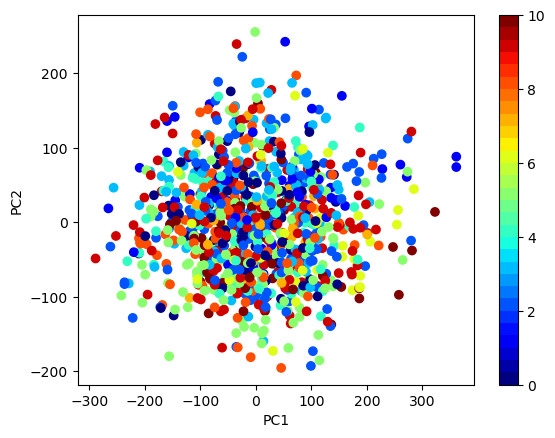

In [58]:
import matplotlib.pyplot as plt

# Graficar las dos primeras componentes principales

cmap = plt.get_cmap('jet', 30)
cmap.set_under('gray')

plt.scatter(train_transformed_data[:, 0], train_transformed_data[:, 1], c=train_labels_subset,cmap=cmap)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random


# Selecciona un subconjunto aleatorio de los datos de entrenamiento y labels
subset_size = 1000  # Tamaño del subconjunto
subset_indices = random.sample(range(len(eval_images_resized)), subset_size)
eval_data_subset = [eval_images_resized[i] for i in subset_indices]
eval_labels_subset = [eval_numeric_labels[i] for i in subset_indices]

# Asegúrate de que las imágenes estén almacenadas como vectores 1D
eval_data_subset = np.array(eval_data_subset).reshape(len(eval_data_subset), -1)


scaler = MinMaxScaler()
eval_data_pca = scaler.fit_transform(eval_data_subset)

# Crea una instancia de PCA con un número de componentes que desees
pca = PCA(n_components=20)

# Ajusta el modelo de PCA al subconjunto de los datos de entrenamiento
pca.fit(eval_data_pca)

# Transforma los datos de entrenamiento usando el modelo PCA
eval_transformed_data = pca.transform(eval_data_pca)

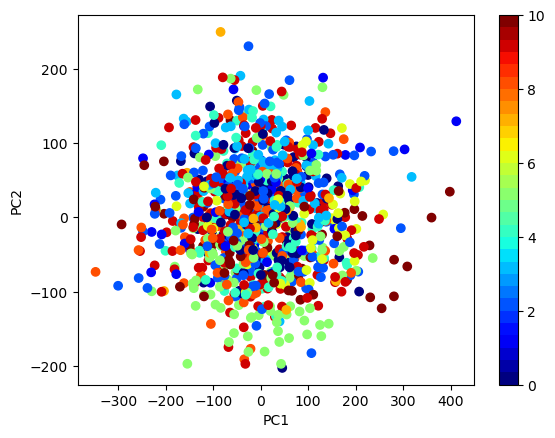

In [60]:
import matplotlib.pyplot as plt

# Graficar las dos primeras componentes principales

cmap = plt.get_cmap('jet', 30)
cmap.set_under('gray')

plt.scatter(eval_transformed_data[:, 0], eval_transformed_data[:, 1], c=eval_labels_subset,cmap=cmap)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Train a logistic regression classifier on the training data
clf_original = LogisticRegression()
clf_original.fit(train_transformed_data, train_labels_subset)

# Evaluate the classifier on the testing data
accuracy_original = clf_original.score(eval_transformed_data, eval_labels_subset)

# Print the accuracy of the original data
print('Accuracy Original: {:.2f}%'.format(accuracy_original*100))

Accuracy Original: 14.60%


In [62]:
from sklearn.cluster import KMeans

# Crear instancia de KMeans con 11 clusters
kmeans = KMeans(n_clusters=11)

# Entrenar modelo k-means con datos de entrenamiento transformados
kmeans.fit(train_transformed_data)

# Predecir los clusters de los datos de evaluación
eval_clusters = kmeans.predict(eval_transformed_data)

# Evaluar la precisión de los clusters predichos
accuracy_kmeans = sum(eval_clusters == eval_labels_subset) / len(eval_labels_subset)

# Imprimir la precisión de los clusters predichos
print('Accuracy KMeans: {:.2f}%'.format(accuracy_kmeans*100))


Accuracy KMeans: 7.40%
